In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

A Solar é uma rede de farmácias que opera com mais de 3.000 estabelecimentos em 7 países. Atualmente, os gerentes de cada farmácia da rede Solar têm a tarefa de prever suas vendas diárias com até seis semanas de antecedência. As vendas nas lojas são influenciadas por vários fatores, incluindo promoções, competidores, feriados escolares e estaduais, sazonalidade e localidade. Com milhares de gerentes prevendo vendas com base em suas circunstâncias únicas, a precisão dos resultados pode ser bastante variada.

Para as previsões você deve considerar um ID, que é um número representando a combinação entre o ID da loja e uma data. Além do ID, sua submissão deve conter a previsão do volume de vendas. Leia atentamente a descrição dos principais campos nos arquivos fornecidos nesta competição.

# Descrição dos Campos
* ID - um ID que representa uma tupla (Store, Date) dentro do conjunto de dados
* Store - um ID único para cada loja
* Sales - o volume de negócios de um determinado dia (é isso que você está prevendo)
* Customers - o número de clientes em um determinado dia
* Open - um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta
* StateHoliday - indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, estão fechadas nos feriados estaduais. Note que todas as escolas estão fechadas nos feriados e fins de semana. a = feriado público, b = feriado de Páscoa, c = Natal, 0 = Nenhum
* SchoolHoliday - indica se a (Store, Date) foi afetada pelo fechamento de escolas públicas
* StoreType - diferencia entre 4 modelos de lojas diferentes: a, b, c, d
* Assortment - descreve um nível: a = básico, b = extra, c = estendido
* CompetitionDistance - distância em metros até a loja concorrente mais próxima
* CompetitionOpenSince[Month/Year] - indica o ano e mês aproximado da hora em que o concorrente mais próximo foi aberto
* Promo - indica se uma loja está executando uma promoção nesse dia
* Promo2 - promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando
* Promo2Since[Year/Week] - descreve o ano e a semana do calendário em que a loja começou a participar do Promo2
* PromoInterval - descreve os intervalos consecutivos que o Promo2 é iniciado, indicando os meses em que a promoção é iniciada novamente. Por exemplo. "Feb, May, Aug, Nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja.

In [2]:
dflojas = pd.read_csv("lojas.csv")
dflojas.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [3]:
dftreino = pd.read_csv("dataset_treino.csv")
dftreino.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [4]:
dfteste = pd.read_csv("dataset_teste.csv")
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


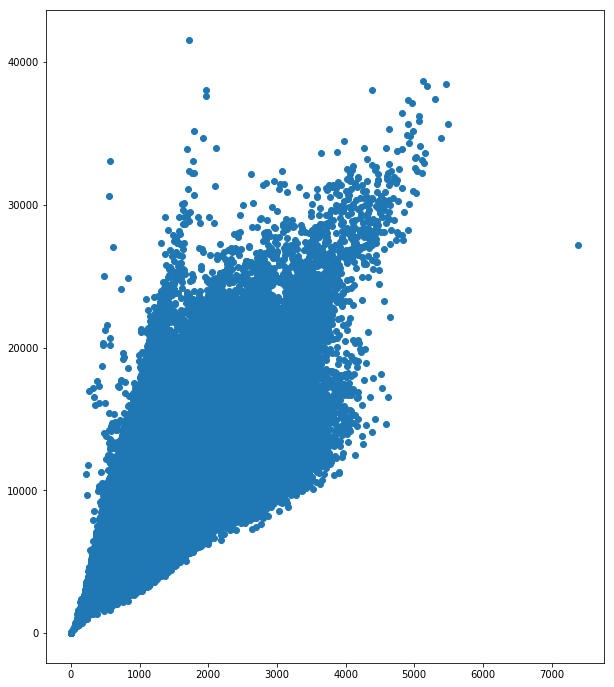

In [5]:
plt.figure(figsize=(10, 12))
plt.scatter(dftreino['Customers'], dftreino['Sales'])

In [6]:
dftreino.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


In [8]:
#sns.pairplot(dftreino, hue='Sales')
dftreino.groupby('StateHoliday').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
StateHoliday,,,,,,,,
0,131072,131072,131072,131072,131072,131072,131072,131072
0,855087,855087,855087,855087,855087,855087,855087,855087
a,20260,20260,20260,20260,20260,20260,20260,20260
b,6690,6690,6690,6690,6690,6690,6690,6690
c,4100,4100,4100,4100,4100,4100,4100,4100


In [9]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    else:
        return 3

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
dftreino['Timestamp'] = pd.to_datetime(dftreino['Date'])
dftreino['Year'] = dftreino['Timestamp'].apply(lambda data: data.year)
dftreino['Month'] = dftreino['Timestamp'].apply(lambda data: data.month)
dftreino['Day'] = dftreino['Timestamp'].apply(lambda data: data.day)
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31,2015,7,31


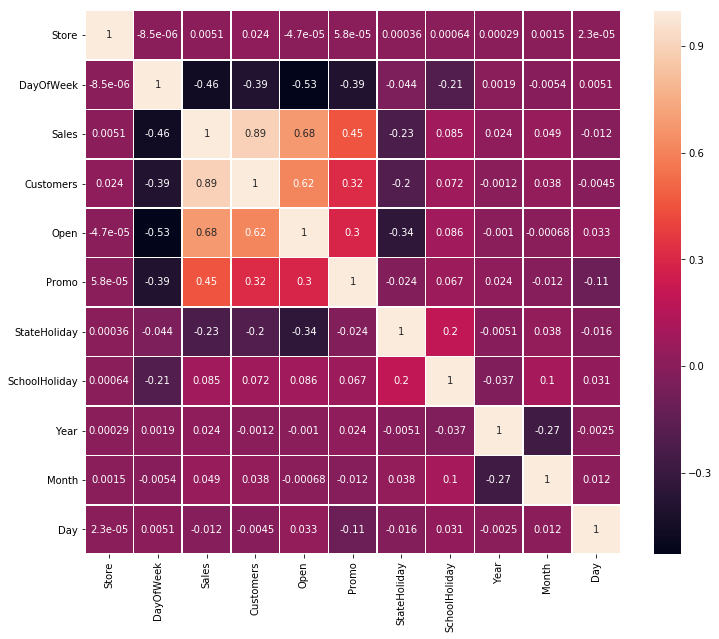

In [56]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dftreino.corr(), annot = True, linewidths=.5, ax=ax)

In [80]:
dftreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Timestamp', 'Year', 'Month', 'Day'],
      dtype='object')

In [81]:
XtreinoCustomers = dftreino[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]
ytreinoCustomers = dftreino['Customers']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XtreinoCustomers, ytreinoCustomers, test_size = 0.3)

In [84]:
XtreinoCustomers.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Year', 'Month', 'Day'],
      dtype='object')

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
predicao = lm.predict(X_test)
len(predicao)

356024

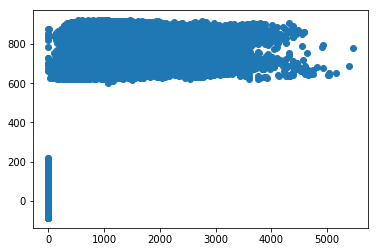

In [93]:
plt.scatter(y_test, predicao)

In [97]:
ytreinoCustomers

0           555
1           625
2           821
3          1498
4           559
5           589
6          1414
7           833
8           687
9           681
10         1236
11          962
12          568
13          710
14          766
15          979
16          946
17          936
18          718
19          974
20          682
21          633
22          560
23         1082
24         1586
25          611
26         1263
27          663
28          737
29          625
           ... 
1017179       0
1017180       0
1017181       0
1017182       0
1017183       0
1017184       0
1017185       0
1017186       0
1017187       0
1017188       0
1017189       0
1017190    1405
1017191       0
1017192       0
1017193       0
1017194       0
1017195       0
1017196       0
1017197       0
1017198       0
1017199       0
1017200       0
1017201       0
1017202       0
1017203       0
1017204       0
1017205       0
1017206       0
1017207       0
1017208       0
Name: Customers, Length:

In [62]:
print(lm.intercept_)

-285111.2140886349


In [63]:
lm.coef_

array([-1.46782844e-01,  6.06943620e+00,  1.81395530e+03,  1.33192701e+03,
        3.80784405e+01,  1.41470498e+02,  3.50217522e+01])

In [64]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
cdf

,Coeficiente
Store,-0.146783
Customers,6.069436
Open,1813.955305
Promo,1331.927014
SchoolHoliday,38.078441
Year,141.470498
Month,35.021752


In [65]:
predicao = lm.predict(X_test)
predicao

array([-315.10082701, 5682.79415924, 4575.57065852, ..., 5995.81190595,
       7018.43036405, 5230.85905414])

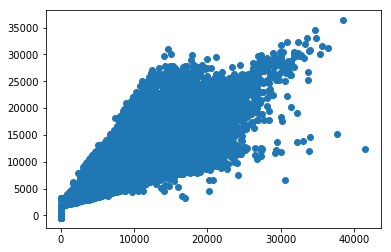

In [66]:
plt.scatter(y_test, predicao)

In [67]:
dfteste['Timestamp'] = pd.to_datetime(dfteste['Date'])
dfteste['Year'] = dfteste['Timestamp'].apply(lambda data: data.year)
dfteste['Month'] = dfteste['Timestamp'].apply(lambda data: data.month)
dfteste['Day'] = dfteste['Timestamp'].apply(lambda data: data.day)
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,Timestamp,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,555,2015-09-17,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,625,2015-09-17,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,821,2015-09-17,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,1498,2015-09-17,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,559,2015-09-17,2015,9,17


In [68]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    else:
        return 3

dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: strToInt(x))
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,Timestamp,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,555,2015-09-17,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,625,2015-09-17,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,821,2015-09-17,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,1498,2015-09-17,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,559,2015-09-17,2015,9,17


In [69]:
dftreino['Customers'].describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

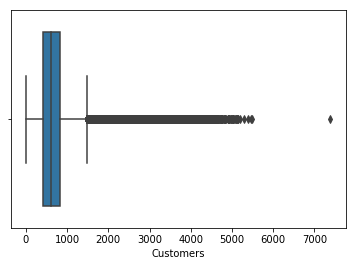

In [70]:
sns.boxplot(dftreino['Customers'])

In [71]:
dfteste['Customers'] = dftreino['Customers'].mean()

In [72]:
dfteste['Open'] = dfteste['Open'].fillna(1);

In [73]:
X_dfteste = dfteste[['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month']]

In [74]:
dfteste_predict = lm.predict(X_dfteste)
dfteste_predict

array([7255.60873515, 7255.31516946, 7254.72803809, ..., 5725.4374464 ,
       5725.29066355, 5763.22232124])

In [75]:
dfPredito = pd.DataFrame(dfteste_predict)

In [76]:
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.count()

0    41088
dtype: int64

In [77]:
dfPredito.head()

,0
1,7255.608735
2,7255.315169
3,7254.728038
4,7254.581255
5,7254.434472


In [78]:
dfPredito.to_csv('submission.csv')